In [1]:
import numpy as np

from ipywidgets import Image

from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox

from ipycanvas import MultiCanvas, hold_canvas

import matplotlib.pyplot as plt

import math

import imageio

In [78]:
im_size = 450

def make_c(N):
    C = np.zeros( (N, N) )
    for u in range(N):
        for v in range(N):
            if(u==0):
                C[u][v] = math.sqrt(1/float(N))
            else:
                C[u][v] = math.sqrt(2/float(N)) * math.cos( ((2*v + 1) * math.pi * u) / (2* float(N)) )
    return C

def transformar_imagem(imagem, C):
    return np.dot(np.dot(C, imagem), C.transpose())

def inverter_imagem(imagem, C):
    return np.dot(np.dot(C.transpose(), imagem), C)

# retorna os N primeiros pixeis da imagem
def reduzir_imagem(imagem_transformada, N):
    count = 0
    res = np.zeros( imagem_transformada.shape )
    for x in range(imagem_transformada.shape[1]):
        i = 0
        j = x
        while (True):
            res[i][j] = imagem_transformada[i][j]
            i += 1
            j -= 1
            count+=1
            if(count == N):
                return res
            if(j < 0 or i >= imagem_transformada.shape[0]):
                break

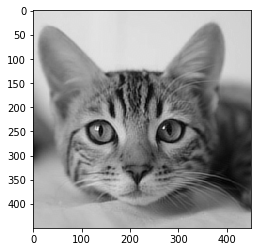

In [118]:
C = make_c(im_size)

im = imageio.imread('gato_cortado.jpg')


im_transformada = transformar_imagem(im, C)
im_ = reduzir_imagem(im_transformada,30000)

im_back = inverter_imagem(im_, C)

imgplot = plt.imshow(im_back, cmap='gray', vmin=0, vmax=255)

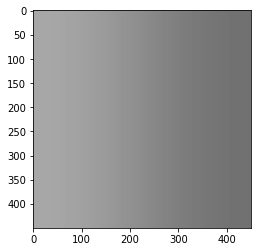

In [77]:
im_

array([[63109.84444444,  8592.18372024, -1491.53060045, ...,
            0.        ,     0.        ,     0.        ],
       [10167.68222716, -5436.32297956,  -267.08126495, ...,
            0.        ,     0.        ,     0.        ],
       [14573.4209141 , -1564.66255904,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [46]:
im_transformada

array([[ 6.31098444e+04,  8.59218372e+03, -1.49153060e+03, ...,
         1.54164232e+00,  1.39193282e+00, -4.97718212e+00],
       [ 1.01676822e+04, -5.43632298e+03, -2.67081265e+02, ...,
         1.02924738e+00,  5.88087786e-01,  7.48186202e-01],
       [ 1.45734209e+04, -1.56466256e+03, -6.98274326e+02, ...,
        -8.69887832e-01, -3.48247975e+00,  4.11539721e-01],
       ...,
       [-1.25125332e+00,  6.77577078e-01,  1.77007512e+00, ...,
         1.51726280e+00,  5.99260302e-01, -4.50296626e-01],
       [ 2.40887507e+00,  6.57195210e-01, -3.06375210e+00, ...,
         1.46730139e+00,  9.44421585e-01, -2.06120510e+00],
       [-3.76484182e+00, -2.22227766e+00,  7.70637994e-01, ...,
        -2.32799172e+00, -4.96060525e-01,  1.18279896e+00]])